<a href="https://colab.research.google.com/github/rainydayisbright/bicyclez/blob/main/TrainModelForApiFromRoboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install library ที่จำเป็น

In [41]:
!pip install roboflow ultralytics<=8.0.20 opencv-python -q

/bin/bash: line 1: =8.0.20: No such file or directory


# Download datasets ที่ label แล้วจาก Roboflow

In [42]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3veRHWgmVVMYkxp5vTOV")
project = rf.workspace("test-mtdkd").project("mangosteen-for-techkud")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (54.3 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree {dataset.location}

/bin/bash: line 1: tree: command not found


In [48]:
data_yaml = """
train: /content/mangosteen-for-techkud-2/train
val: /content/mangosteen-for-techkud-2/valid

nc: 3
names: [bloodline, ripe, unripe]
"""

with open('/content/mangosteen-for-techkud-2/data.yaml', 'w') as f:
    f.write(data_yaml)

print("✅ data.yaml ถูกสร้างใหม่เรียบร้อยแล้ว!")
!cat /content/mangosteen-for-techkud-2/data.yaml


✅ data.yaml ถูกสร้างใหม่เรียบร้อยแล้ว!

train: /content/mangosteen-for-techkud-2/train
val: /content/mangosteen-for-techkud-2/valid

nc: 3
names: [bloodline, ripe, unripe]


# Training with YOLOv8

In [49]:
# Download pretrain model
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

In [51]:
# ตรวจสอบ datayaml ก่อน
with open("/content/mangosteen-for-techkud-2/data.yaml", "r") as f:
    print(f.read())



train: /content/mangosteen-for-techkud-2/train
val: /content/mangosteen-for-techkud-2/valid

nc: 3
names: [bloodline, ripe, unripe]



In [58]:
!ls /content/drive/MyDrive/yolo_runs/fruit_train7/

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


In [57]:
!cat /content/drive/MyDrive/yolo_runs/fruit_train7/results.txt

cat: /content/drive/MyDrive/yolo_runs/fruit_train7/results.txt: No such file or directory


In [67]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# กำหนด path ไปยัง data.yaml
path = "/content/mangosteen-for-techkud-2/data.yaml"

# สั่ง train โดยให้ save weights ทุก epoch ลงใน Drive
results = model.train(
    data=path,
    epochs=40,
    imgsz=640,
    save_period=1,  # เซฟทุก epoch
    project="/content/drive/MyDrive/yolo_runs",  # กำหนดให้เซฟเข้า Drive
    name="mangosteen-final-model"  # ชื่อโฟลเดอร์สำหรับรันนี้
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/mangosteen-for-techkud-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo_runs/fruit_train8/weights/best.pt, momentum=0

train: Scanning /content/mangosteen-for-techkud-2/train/labels.cache... 1326 images, 3 backgrounds, 675 corrupt: 100%|██████████| 1326/1326 [00:00<?, ?it/s]

train: /content/mangosteen-for-techkud-2/train/images/152918_0_jpg.rf.1137c3f0e18df4a1e12e2cfc974fb676.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/mangosteen-for-techkud-2/train/images/152919_0_jpg.rf.d2177713962e9bd29be4b5e57f0d7970.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/mangosteen-for-techkud-2/train/images/152920_0_jpg.rf.ac0aaafd6eeb39ff530619fa581d089c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/mangosteen-for-techkud-2/train/images/152921_0_jpg.rf.f98ba6adff67b3ea9f33cb153d9dcc18.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/mangosteen-for-techkud-2/train/images/152923_0_jpg.rf.0c14729ea81705ec63808eba74b08a45.jpg: ignoring corrupt image/label: Label clas

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 547.6±254.8 MB/s, size: 806.9 KB)


val: Scanning /content/mangosteen-for-techkud-2/valid/labels.cache... 153 images, 0 backgrounds, 73 corrupt: 100%|██████████| 153/153 [00:00<?, ?it/s]

val: /content/mangosteen-for-techkud-2/valid/images/152922_0_jpg.rf.54c9759ae91dc7e54e70a3ae357f30c7.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/mangosteen-for-techkud-2/valid/images/152927_0_jpg.rf.9a0450f61deec6f934bc6388cdffa24f.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/mangosteen-for-techkud-2/valid/images/152936_0_jpg.rf.8bf362a6ca1e184e2798d0c2434a89fe.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/mangosteen-for-techkud-2/valid/images/152948_0_jpg.rf.ae575f6d2d02c96681fa825aa4d274b1.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/mangosteen-for-techkud-2/valid/images/152960_0_jpg.rf.ed759f0ca22c45c6cb44dcdb2884e40a.jpg: ignoring corrupt image/label: Label class 2 exceed

Plotting labels to /content/drive/MyDrive/yolo_runs/mangosteen-final-model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_runs/mangosteen-final-model
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.15G      1.051      1.087      1.293         25        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         80         86      0.998      0.884      0.933      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.62G      1.058      1.031      1.274         20        640: 100%|██████████| 41/41 [00:27<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         80         86          1      0.895      0.947      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.62G      1.168      1.044      1.324         29        640: 100%|██████████| 41/41 [00:29<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80         86      0.998      0.895       0.95      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.62G      1.141          1      1.321         24        640: 100%|██████████| 41/41 [00:35<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         80         86      0.998      0.907      0.934       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.62G      1.079     0.8956      1.263         32        640: 100%|██████████| 41/41 [00:33<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         80         86      0.986      0.907      0.944      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.63G      1.087     0.8314      1.266         26        640: 100%|██████████| 41/41 [00:32<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         80         86      0.997      0.907      0.964      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.63G      1.084     0.8243      1.258         34        640: 100%|██████████| 41/41 [00:26<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         80         86      0.998      0.907      0.943       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.63G      1.068     0.7762       1.24         32        640: 100%|██████████| 41/41 [00:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         80         86          1      0.905      0.965      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.63G      1.016     0.7117      1.215         26        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         80         86          1      0.904      0.956      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.63G      1.037     0.7281      1.236         52        640: 100%|██████████| 41/41 [00:26<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         80         86      0.984      0.907      0.953      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.63G      1.016     0.6983      1.194         22        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         80         86      0.985      0.907      0.958       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.63G     0.9887     0.6739      1.197         27        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         80         86      0.984      0.895      0.957      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.63G      1.005     0.6832      1.202         21        640: 100%|██████████| 41/41 [00:26<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         80         86          1      0.907       0.96      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.63G     0.9763     0.6417       1.18         22        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         80         86      0.976      0.907      0.951      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.63G      1.009     0.6539      1.201         32        640: 100%|██████████| 41/41 [00:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         80         86      0.942      0.907      0.945      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.63G     0.9542     0.6101      1.161         33        640: 100%|██████████| 41/41 [00:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         80         86      0.986      0.907      0.953      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.63G     0.9555     0.6127      1.178         26        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         80         86      0.997      0.907      0.969      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.63G     0.9402     0.5867      1.161         21        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80         86      0.985      0.907      0.964       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.63G     0.9446     0.5827      1.171         26        640: 100%|██████████| 41/41 [00:26<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         80         86      0.996      0.907      0.966      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.63G     0.9181     0.5599      1.148         29        640: 100%|██████████| 41/41 [00:26<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         80         86      0.972      0.907       0.96      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.63G     0.9304      0.568      1.148         26        640: 100%|██████████| 41/41 [00:26<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         80         86      0.995      0.907      0.972      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.63G     0.8994     0.5566      1.137         27        640: 100%|██████████| 41/41 [00:27<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         80         86      0.986      0.895      0.968       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.63G     0.9245     0.5545      1.141         35        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         80         86      0.998      0.907      0.966      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.63G      0.918     0.5549      1.142         24        640: 100%|██████████| 41/41 [00:26<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         80         86      0.987      0.916      0.969       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.64G     0.8807     0.5429      1.118         33        640: 100%|██████████| 41/41 [00:31<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         80         86      0.987      0.905      0.966       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.65G     0.8874     0.5445      1.121         21        640: 100%|██████████| 41/41 [00:28<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         80         86      0.987      0.916      0.972      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.67G     0.8782     0.5269      1.118         33        640: 100%|██████████| 41/41 [00:32<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         80         86      0.987      0.914      0.968      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.67G      0.862     0.5161       1.11         30        640: 100%|██████████| 41/41 [00:34<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         80         86      0.975      0.917      0.966      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.67G     0.8464     0.4994      1.095         26        640: 100%|██████████| 41/41 [00:32<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         80         86      0.981      0.907      0.967      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.67G     0.8608     0.5141      1.111         27        640: 100%|██████████| 41/41 [00:32<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         80         86      0.991      0.907      0.972       0.71


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.67G     0.8277     0.5078      1.118         10        640: 100%|██████████| 41/41 [00:28<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         80         86      0.975      0.916      0.977      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.67G     0.8294     0.4733      1.108         11        640: 100%|██████████| 41/41 [00:24<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         80         86      0.986      0.907      0.967      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.67G     0.8117     0.4574      1.102         25        640: 100%|██████████| 41/41 [00:27<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         80         86      0.984      0.907      0.969      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.67G     0.7881     0.4471      1.093         11        640: 100%|██████████| 41/41 [00:32<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         80         86      0.981      0.907      0.965      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.67G     0.7776     0.4281       1.08         17        640: 100%|██████████| 41/41 [00:33<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         80         86      0.952      0.926      0.968      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.67G     0.7736     0.4238      1.076         11        640: 100%|██████████| 41/41 [00:26<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         80         86      0.975      0.913      0.962      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.67G     0.7637     0.4204      1.071         12        640: 100%|██████████| 41/41 [00:31<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         80         86      0.972      0.907      0.967       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.67G     0.7442     0.4122      1.056         10        640: 100%|██████████| 41/41 [00:37<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         80         86      0.975      0.917      0.975      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.67G     0.7383     0.4061      1.062         28        640: 100%|██████████| 41/41 [00:28<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         80         86      0.975      0.925      0.973      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.67G     0.7365      0.412      1.043         11        640: 100%|██████████| 41/41 [00:27<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         80         86      0.987      0.903      0.967      0.713



40 epochs completed in 0.352 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_runs/mangosteen-final-model/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_runs/mangosteen-final-model/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolo_runs/mangosteen-final-model/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


                   all         80         86      0.995      0.907      0.972      0.727
             bloodline         80         86      0.995      0.907      0.972      0.727
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_runs/mangosteen-final-model


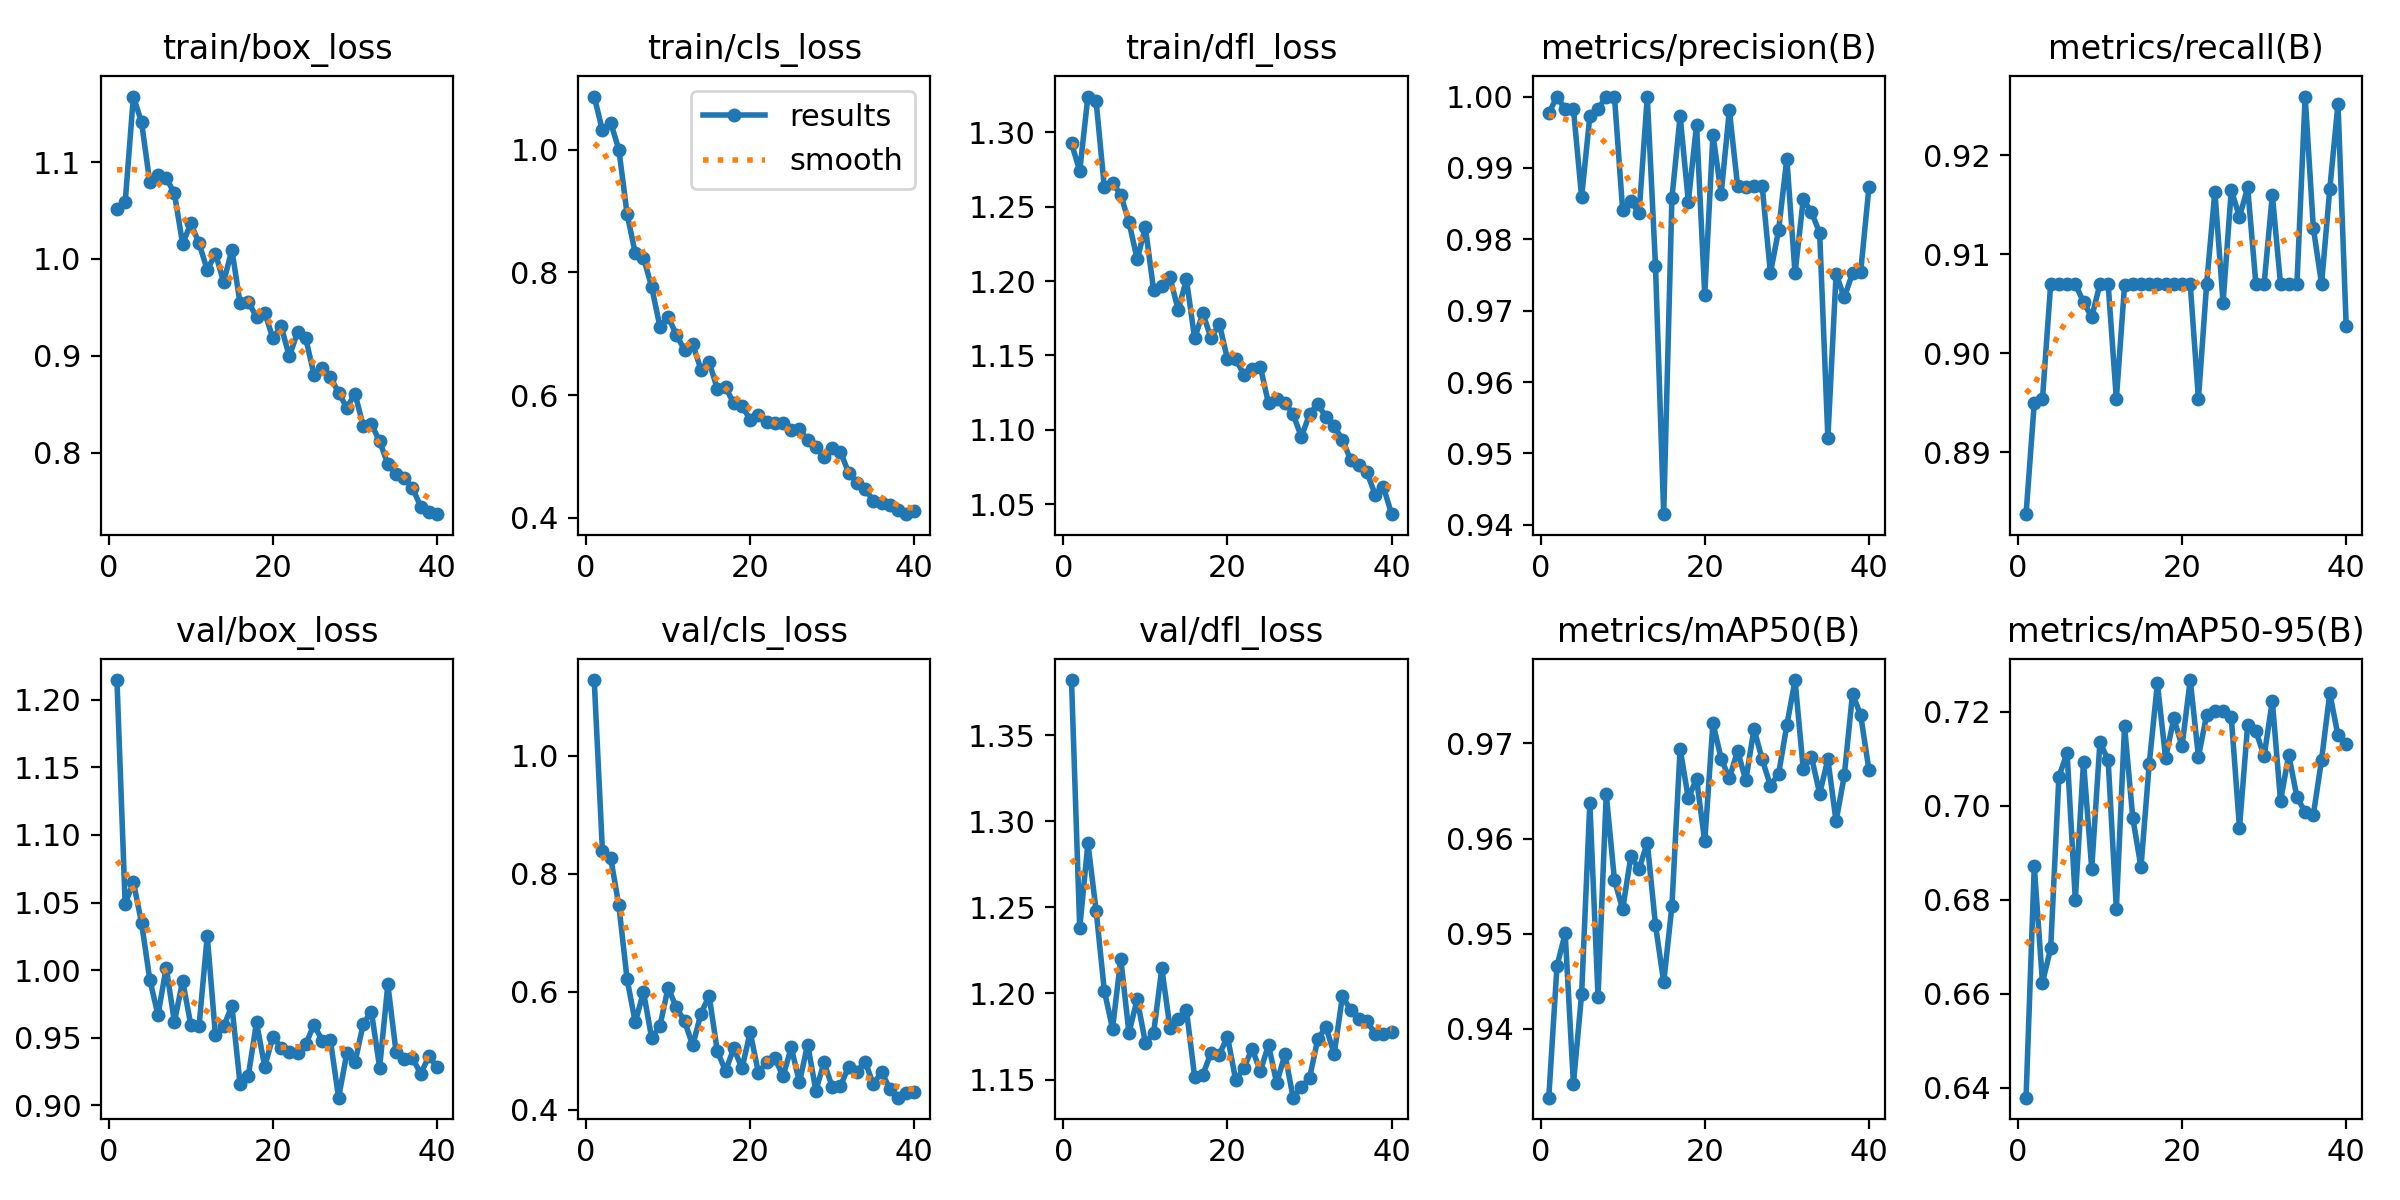

In [68]:
from IPython.display import Image
Image("/content/drive/MyDrive/yolo_runs/mangosteen-final-model/results.png")

In [ ]:
# continue-save-weight
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolo_runs/fruit_train/weights/epoch39.pt")
path = "/content/fruit-det-1/data.yaml"

results = model.train(
    data=path,
    epochs=40, # จำนวน epochs ใหม่ที่อยากเทรน (จะเทรนต่อจาก checkpoint)
    imgsz=640,
    save_period=1,
    project="/content/drive/MyDrive/yolo_runs",
    name="fruit_train_resume" # ชื่อ folder ใหม่ เพื่อแยกจากรอบก่อนหน้า
)


Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruit-det-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo_runs/fruit_train/weights/epoch39.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fruit_train_resume2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

RuntimeError: Dataset '/content/fruit-det-1/data.yaml' error ❌ '/content/fruit-det-1/data.yaml' does not exist

> Model ที่เราสามรถ download ไปใช้ต่อได้อยู่ที่ /run/detect/train/weights/best.pt
> สามารถอ่านข้อมูลการ Train เพิ่มได้ที่ https://docs.ultralytics.com/modes/train









# Inference custom trained model

In [72]:
# Doc: https://docs.ultralytics.com/modes/predict/
from ultralytics import YOLO

# path ของ model ที่เรา train
custom_model = "/content/drive/MyDrive/yolo_runs/mangosteen-final-model/weights/best.pt"

# Load a pretrained YOLO11n model
model = YOLO(custom_model)

# path ของรูปที่เราต้องการจะทำนาย
test_image = "/content/mangosteen-for-techkud-2/test/images/20220528_162603_jpg.rf.93526aaec8407cc3b98e689dd02279d9.jpg"

model.predict(test_image, save=True, imgsz=640, conf=0.2)


image 1/1 /content/mangosteen-for-techkud-2/test/images/20220528_162603_jpg.rf.93526aaec8407cc3b98e689dd02279d9.jpg: 480x640 1 bloodline, 7.9ms
Speed: 3.4ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict18


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bloodline', 1: 'ripe', 2: 'unripe'}
 obb: None
 orig_img: array([[[ 42,  56,  85],
         [ 42,  56,  85],
         [ 42,  56,  85],
         ...,
         [ 23, 143, 119],
         [ 24, 144, 120],
         [ 24, 144, 120]],
 
        [[ 42,  56,  85],
         [ 42,  56,  85],
         [ 42,  56,  85],
         ...,
         [ 24, 144, 120],
         [ 24, 144, 120],
         [ 24, 144, 120]],
 
        [[ 42,  56,  85],
         [ 42,  56,  85],
         [ 43,  57,  86],
         ...,
         [ 24, 144, 120],
         [ 25, 145, 121],
         [ 25, 145, 121]],
 
        ...,
 
        [[215, 222, 219],
         [215, 222, 219],
         [215, 222, 219],
         ...,
         [142, 190, 178],
         [112, 196, 178],
         [ 97, 200, 179]],
 
        [[215, 222, 219],
         [215, 222, 219],
         [215, 222, 219],
     



> รูปผลลัพธ์ของการทำนายจะอยู่ที่ /content/runs/detect/predict


> สามารถนำผลลัพธ์ไปใช้ต่อได้ด้วย opencv



> สามารถอ่านข้อมูลการ Train เพิ่มได้ที่ https://docs.ultralytics.com/modes/predict


